In [1]:
import sys
# adding search_optimization_tools to the system path
sys.path.insert(0, '../')

In [2]:
import latexify
import random
import math
import numpy as np
from search_optimization_tools.algorithms.trajectory_based import SimulatedAnnealing
from search_optimization_tools.problems import ProblemBase, ContinuousFunctionBase

In [3]:
@latexify.with_latex
def simple_example(x):
    return (x-6)**2

simple_example_bounds = np.asarray([[0, 31]])
simple_example_obj = ContinuousFunctionBase(simple_example, simple_example_bounds)
simple_example

<latexify.core.with_latex.<locals>._LatexifiedFunction at 0x1768411ea10>

In [4]:
sa = SimulatedAnnealing(max_iter=1000, max_iter_per_temp=100, initial_temp=1000, final_temp=0.0001, cooling_schedule='geometric', cooling_alpha=0.9)

In [5]:
sa.run(simple_example_obj)
sa.s_best, sa.val_best,sa.t,sa.iter

(array([6.00071882]), 5.167062475559348e-07, 9.97938882337113e-05, 154)

In [6]:
sa.init_annealing(simple_example_obj)
print ("init_sol=%f, eval_sol=%f, cur_temp=%f, cur_iter=%d" %(sa.s_cur, sa.val_cur,sa.t,sa.iter))
for i in range(100):
    sa.annealing_step()
    sa.iter += 1
    sa.update_temperature()
    print ("cur_sol=%f, eval_sol=%f, cur_temp=%f, cur_iter=%d" %(sa.s_best, sa.val_best,sa.t,sa.iter))

init_sol=14.409752, eval_sol=70.723924, cur_temp=1000.000000, cur_iter=1
cur_sol=15.748244, eval_sol=95.028257, cur_temp=810.000000, cur_iter=2
cur_sol=15.353352, eval_sol=87.485193, cur_temp=729.000000, cur_iter=3
cur_sol=15.353352, eval_sol=87.485193, cur_temp=656.100000, cur_iter=4
cur_sol=15.353352, eval_sol=87.485193, cur_temp=590.490000, cur_iter=5
cur_sol=15.353352, eval_sol=87.485193, cur_temp=531.441000, cur_iter=6
cur_sol=15.265816, eval_sol=85.855343, cur_temp=478.296900, cur_iter=7
cur_sol=13.609273, eval_sol=57.901034, cur_temp=430.467210, cur_iter=8
cur_sol=13.116533, eval_sol=50.645038, cur_temp=387.420489, cur_iter=9
cur_sol=12.669813, eval_sol=44.486408, cur_temp=348.678440, cur_iter=10
cur_sol=12.592527, eval_sol=43.461412, cur_temp=313.810596, cur_iter=11
cur_sol=12.592527, eval_sol=43.461412, cur_temp=282.429536, cur_iter=12
cur_sol=11.925650, eval_sol=35.113329, cur_temp=254.186583, cur_iter=13
cur_sol=11.296929, eval_sol=28.057454, cur_temp=228.767925, cur_iter=14

global minimum: x = 5.9781, f(x) = 0.0005


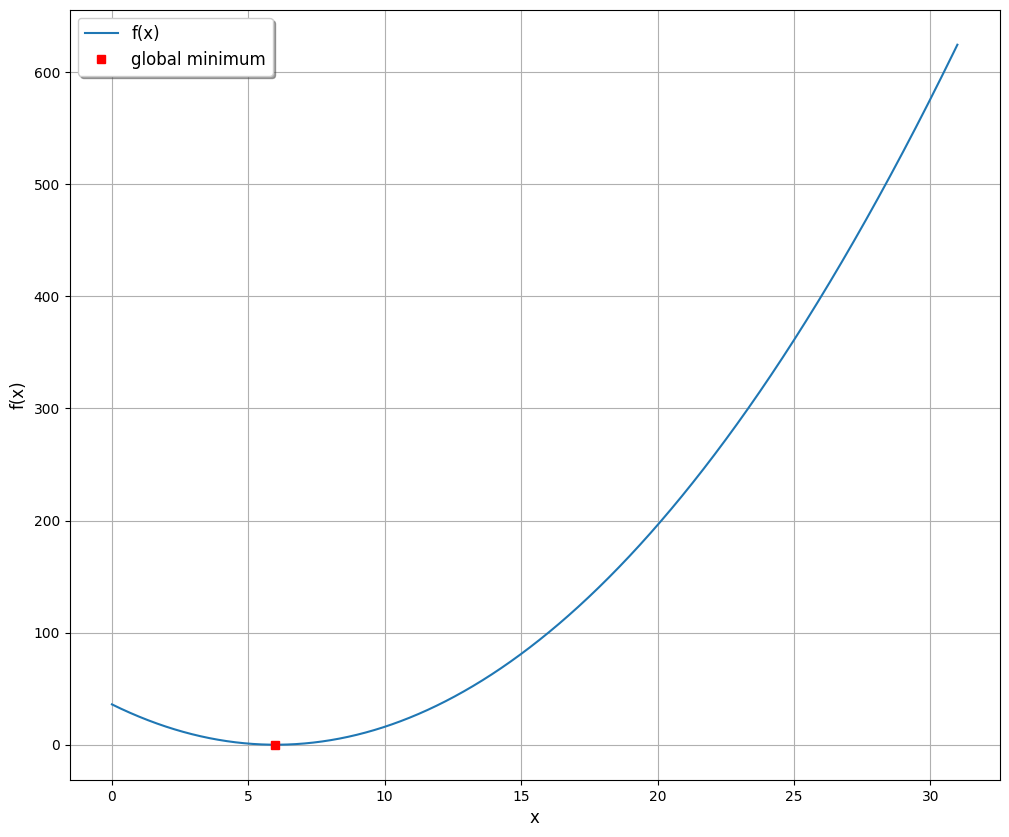

In [7]:
simple_example_obj.plot(sa.s_best)

In [8]:
def Bohachevsky(x_1, x_2):
    return x_1**2 +2*(x_2**2)-0.3*np.cos(3*np.pi*x_1)-0.4*np.cos(4*np.pi*x_2)+0.7

Bohachevsky_bounds = np.asarray([[-100, 100], [-100, 100]])
Bohachevsky_obj = ContinuousFunctionBase(Bohachevsky, Bohachevsky_bounds, 5)

In [9]:
sa.run(Bohachevsky_obj)
sa.s_best, sa.val_best,sa.t,sa.iter

(array([0.0278936 , 0.02912474]),
 0.03927408580929481,
 9.97938882337113e-05,
 154)

global minimum: x = 0.0279, 0.0291, f(x) = 0.0393


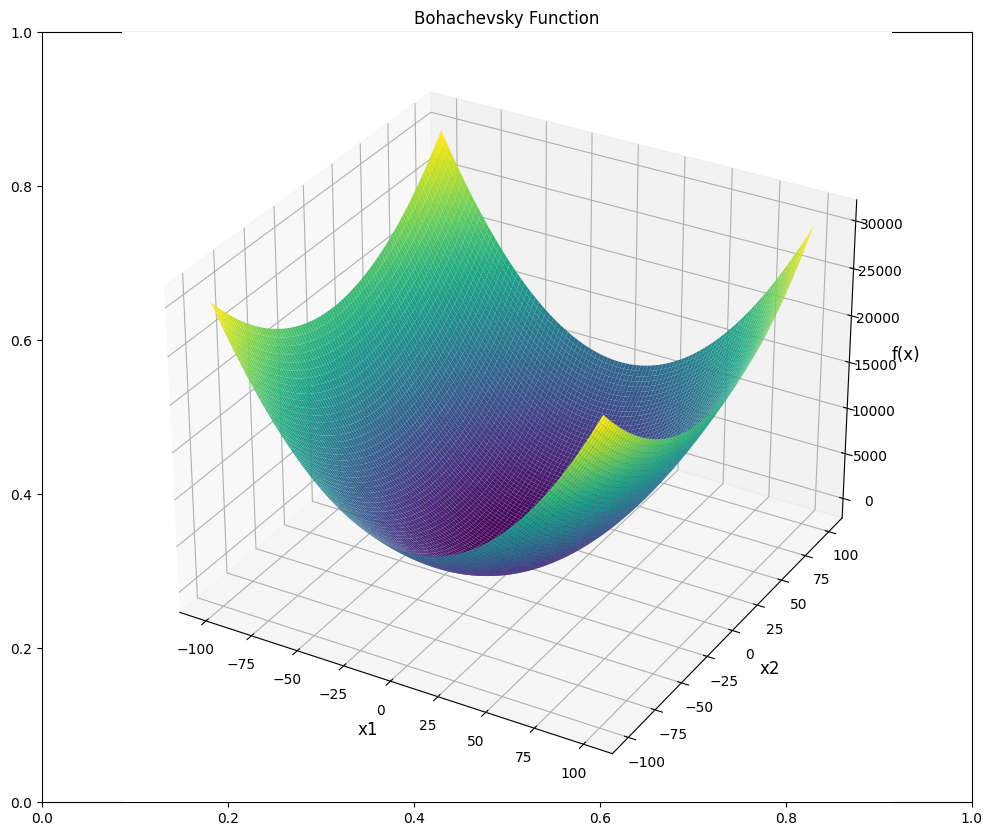

In [10]:
Bohachevsky_obj.plot(sa.s_best,'Bohachevsky Function')

In [11]:
@latexify.with_latex
def bukin(x_1, x_2):
    return 100*math.sqrt(abs(x_2-0.01*x_1**2)) + 0.01 * abs(x_1 + 10)

bukin_bounds = np.asarray([[-15, -5], [-3, 3]])
bukin_obj = ContinuousFunctionBase(bukin, bukin_bounds, 5)
bukin

<latexify.core.with_latex.<locals>._LatexifiedFunction at 0x1768707a710>

In [12]:
sa.run(bukin_obj)
sa.s_best, sa.val_best,sa.t,sa.iter

(array([-12.48602528,   1.5590904 ]),
 0.9310873098621766,
 9.97938882337113e-05,
 154)

global minimum: x = -12.4860, 1.5591, f(x) = 0.9311


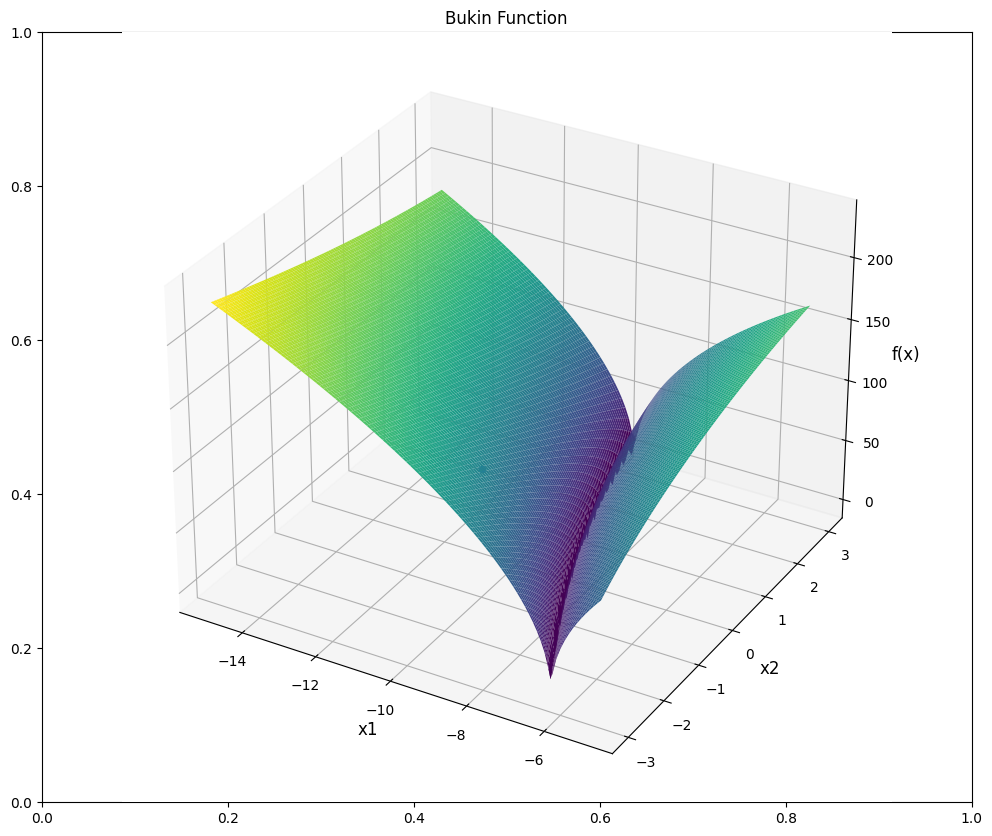

In [13]:
bukin_obj.plot(sa.s_best,'Bukin Function')

In [14]:
pi = math.pi
@latexify.with_latex
def gramacy_and_lee(x):
    return math.sin(10*pi*x)/(2*x) + (x-1)**4

gramacy_and_lee_bounds = np.asarray([[0.5, 2.5]])
gramacy_and_lee_obj = ContinuousFunctionBase(gramacy_and_lee, gramacy_and_lee_bounds, .1)
gramacy_and_lee

<latexify.core.with_latex.<locals>._LatexifiedFunction at 0x1768774c0a0>

In [15]:
sa.run(gramacy_and_lee_obj)
sa.s_best, sa.val_best,sa.t,sa.iter

(array([0.54857162]), -0.869011104915911, 9.97938882337113e-05, 154)

global minimum: x = 0.5486, f(x) = -0.8690


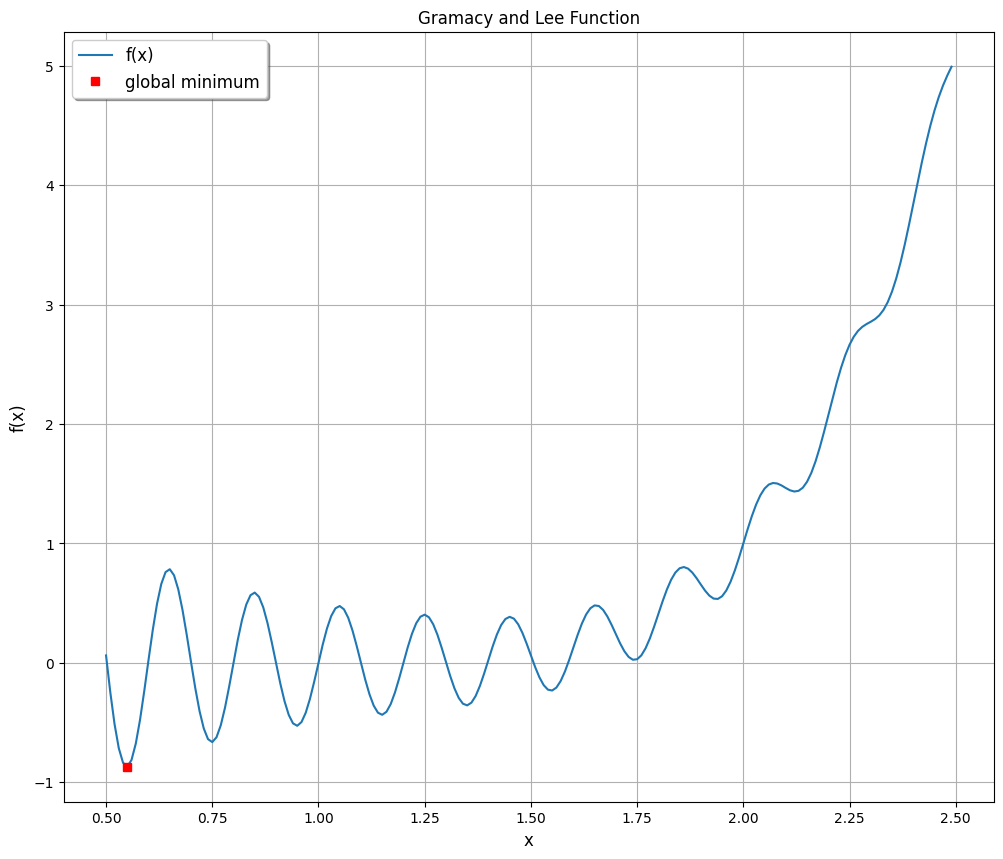

In [16]:
gramacy_and_lee_obj.plot(sa.s_best,'Gramacy and Lee Function')

In [17]:
def griewank(*x):
    x = np.asarray(x)
    return np.sum(x**2/4000) - np.prod(np.cos(x/np.sqrt(np.asarray(range(1, len(x)+1))))) + 1

griewank_bounds = np.asarray([[-600, 600]])
griewank_1d=ContinuousFunctionBase(griewank, griewank_bounds, 10)

In [18]:
sa.run(griewank_1d)
sa.s_best, sa.val_best,sa.t,sa.iter

(array([0.00201477]), 2.0306677074310997e-06, 9.97938882337113e-05, 154)

global minimum: x = 0.0020, f(x) = 0.0000


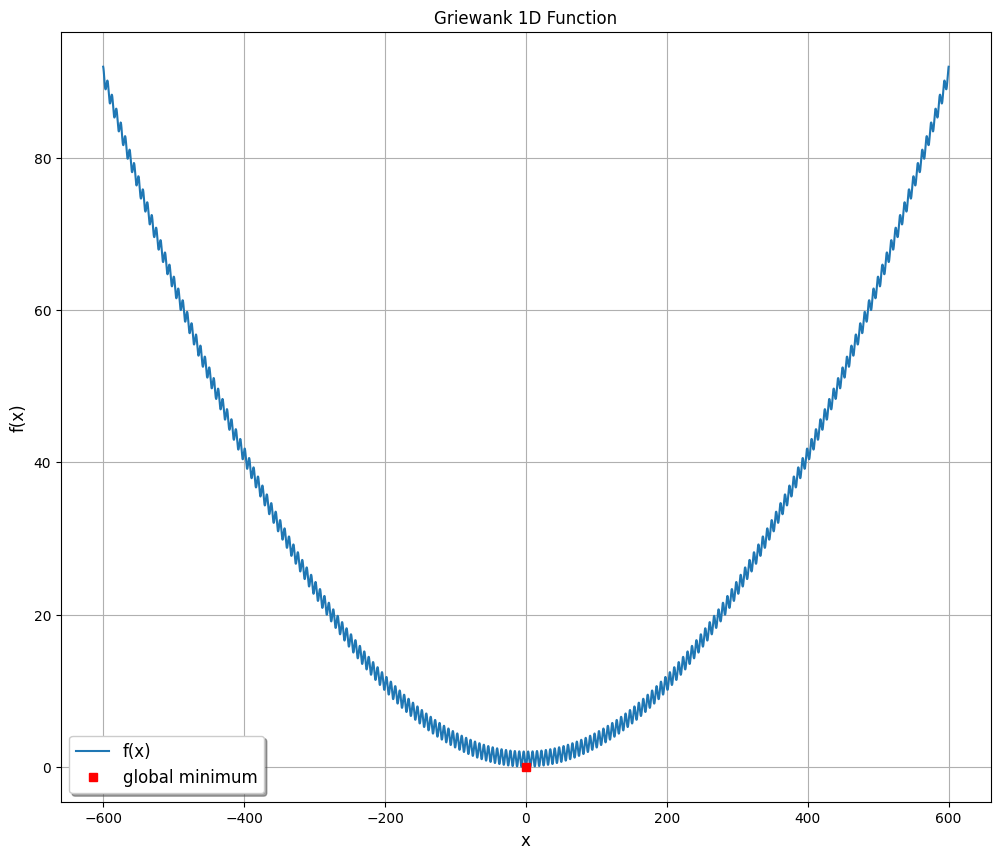

In [19]:
griewank_1d.plot(sa.s_best,'Griewank 1D Function')

In [20]:
griewank_bounds_2d = np.asarray([[-600, 600]]*2)
griewank_2d=ContinuousFunctionBase(griewank, griewank_bounds_2d, (griewank_bounds_2d[:, 1] - griewank_bounds_2d[:, 0])/10)

In [21]:
sa.run(griewank_2d)
sa.s_best, sa.val_best,sa.t,sa.iter

(array([ -3.34561782, -13.23504666]),
 0.06947506993290353,
 9.97938882337113e-05,
 154)

global minimum: x = -3.3456, -13.2350, f(x) = 0.0695


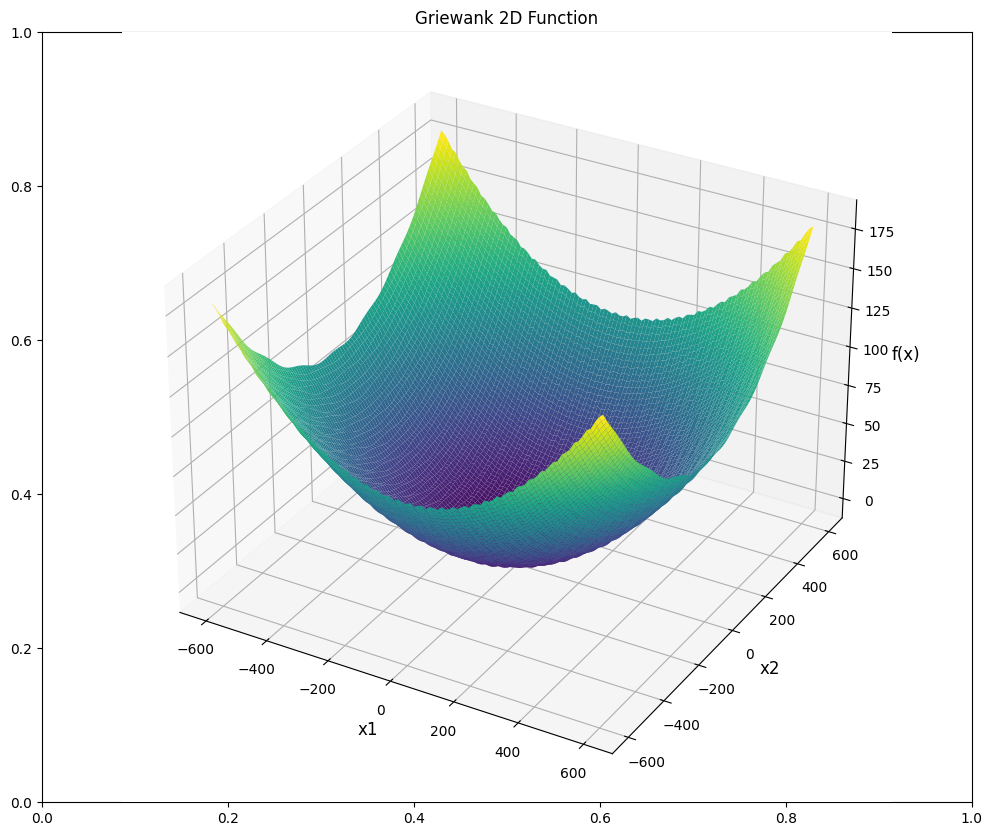

In [22]:
griewank_2d.plot(sa.s_best,'Griewank 2D Function')

In [23]:
griewank_bounds_3d = np.asarray([[-600, 600]]*3)
griewank_3d=ContinuousFunctionBase(griewank, griewank_bounds_3d, (griewank_bounds_3d[:, 1] - griewank_bounds_3d[:, 0])/10)

In [24]:
sa = SimulatedAnnealing(max_iter=10000, max_iter_per_temp=1000, initial_temp=10000, final_temp=0.0000001, cooling_schedule='linear_inverse', cooling_alpha=0.9)
sa.run(griewank_3d)
sa.s_best, sa.val_best,sa.t,sa.iter

(array([ 3.26398908,  4.31356135, -0.17529001]),
 0.02400796741063016,
 1.1109876680368849,
 10001)